In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simulation import simulation, simulation_to_n

b1 = 1
b2 = 1

lbd = 0.5*(b1 + np.sqrt(b1**2 + 4*b2))
print(lbd)

data = simulation(b1, b2, n_run = 10, T_max = 4.5)

1.618033988749895
start of simulation
time of sim = 56.458576917648315s
mean time = 5.6458576917648315s


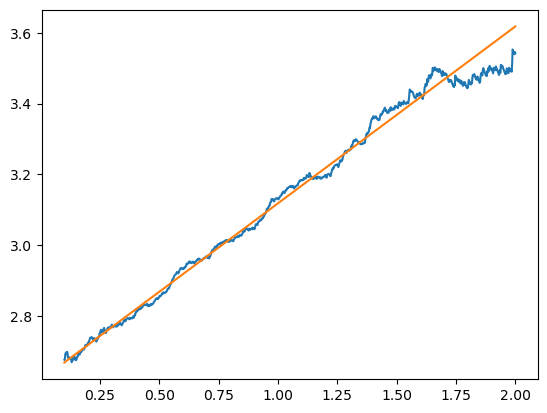

In [2]:
def F(data, x):
    """
    Compute the empirical tail distribution in lengths of open segments
    
    Args:
        data: simulated data
        x (float)
    """
    n = len(data[0])
    a = 0
    
    for i in range(n):
        b = len([y for y in data[0][i] if y > x])
        a += b/len(data[0][i])
        
    return a/n

X = np.linspace(0.1, 2, 1000)
Y = [F(data, x) for x in X]
Z = [lbd + b1 + b2/2*x for x in X] #theoretical distribution
plt.plot(X, -np.log(Y)/X)
plt.plot(X, Z)

In [3]:
from scipy.optimize import minimize
from scipy.optimize import Bounds


def bhat(data, interval):
    """
    Estimate b1 and b2
    
    Args:
        data: simulated data
        interval (list[float] of lenght 2): interval over which the functions are matched
        B (int): number of iterations
    """
    X = np.linspace(interval[0], interval[1], 2000)
    Y = np.array([-np.log(F(data, x))/x for x in X])
    Z = np.ones(np.shape(X))
    
    def f(b):
        lbd_ = (b[0] + np.sqrt(b[0]**2 + 4*b[1]))/2
        return sum((Y - (b[0] + lbd_)*Z - b[1]/2*X)**2)

    bounds = Bounds([0,0], [np.inf,np.inf])
    
    b_min = minimize(f, [0,0], bounds=bounds)

    return b_min['x']

In [4]:
bhat(data, [0.1, 2])

array([1.01861888, 0.96120154])

In [5]:
data = simulation_to_n(b1, b2, n_run = 10, n_max = 100)

start of simulation
time of sim = 0.021139860153198242s
mean time = 0.0021139860153198244s


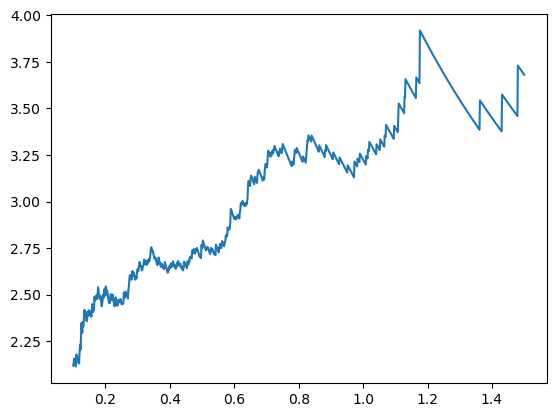

In [6]:
X = np.linspace(0.1, 1.5, 1000)
Y = [F(data, x) for x in X]
plt.plot(X, -np.log(Y)/X)

In [7]:
B1 = []
B2 = []
LBD = []

for i in range(100):
    data = simulation_to_n(b1, b2, n_run = 10, n_max = 100, print_time = False)
    b1_, b2_ = bhat(data, [0.1, 1])
    B1.append(b1_)
    B2.append(b2_)
    LBD.append(0.5*(b1_ + np.sqrt(b1_**2 + 4*b2_)))

print(np.mean(B1))
print(np.std(B1))

print(np.mean(B2))
print(np.std(B2))

print(np.mean(LBD))
print(np.std(LBD))

1.0316388910751275
0.2973413890058665
0.9611867798692288
0.664641297390849
1.6084492064266598
0.117426879843466


In [8]:
data = simulation_to_n(b1, b2, n_run = 10, n_max = 1000)

start of simulation
time of sim = 1.1363170146942139s
mean time = 0.11363170146942139s


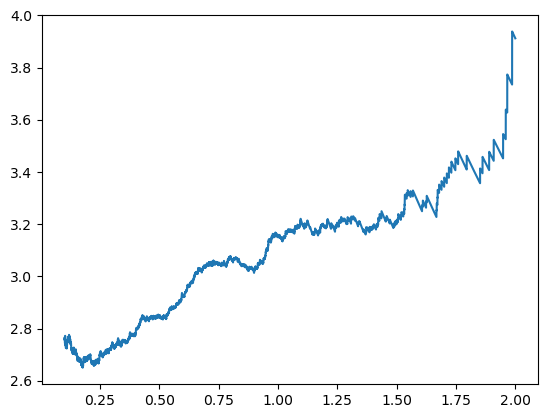

In [9]:
X = np.linspace(0.1, 2, 10000)
Y = [F(data, x) for x in X]
plt.plot(X, -np.log(Y)/X)

In [10]:
B1 = []
B2 = []
LBD = []

for i in range(100):
    data = simulation_to_n(b1, b2, n_run = 10, n_max = 1000, print_time = False)
    b1_, b2_ = bhat(data, [0.1, 1.5])
    B1.append(b1_)
    B2.append(b2_)
    LBD.append(0.5*(b1_ + np.sqrt(b1_**2 + 4*b2_)))

print(np.mean(B1))
print(np.std(B1))

print(np.mean(B2))
print(np.std(B2))

print(np.mean(LBD))
print(np.std(LBD))

0.9876884686351972
0.08866887536313244
1.0400440518137217
0.1907162150562777
1.6259010401958287
0.029834576665947236
